# Monkfish Star-Oddi DST \#6_4119 (10 min)

In [1]:
%matplotlib inline
import scipy.io
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
from astropy.time import Time
# matplotlib.use('nbagg')
# import mpld3
# mpld3.enable_notebook()

In [2]:
def round_of_rating(number):
    return round(number * 2) / 2

In [3]:
# tag=scipy.io.loadmat('/Users/cliu/Dropbox/Geolocation/projects/monkfish/Preprocessing/processed_tags/4_raw.mat',squeeze_me =False,struct_as_record=True)
tag=scipy.io.loadmat('/Users/cliu/Dropbox/Geolocation/projects/monkfish/Preprocessing/processed_tags/6_raw.mat',squeeze_me =False,struct_as_record=True)
tag=tag['tag']
dnum=tag['dnum'][0,0][:,0]
temp=tag['temp'][0,0][:,0]
depth=tag['depth'][0,0][:,0]
dnum=dnum-678942
idx=depth>20

# # downsample to 0.5m
# depth = np.array([round_of_rating(i) for i in depth])

data=pd.DataFrame({'dnum':dnum[idx],'temp':temp[idx],'depth':depth[idx]})
data['DATE']=Time(data.dnum,format='mjd',scale='utc').datetime
data['DATE']=pd.to_datetime(data['DATE'])
data = data.set_index('DATE')
data.index = data.index.round('S')

# # downsample to 30min
# index = pd.date_range(data.index[0], data.index[-1], freq='30T')
# data = data.reindex(index, method='ffill')

In [4]:
data['depth_change'] = abs(data['depth'].diff())

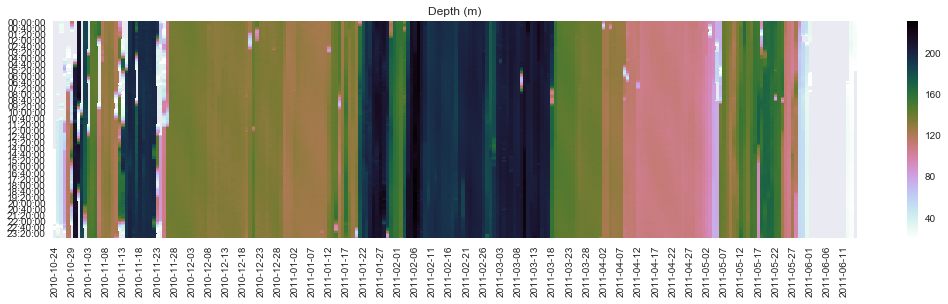

In [5]:
groups = data['depth'].groupby(pd.TimeGrouper('D'))
days = pd.DataFrame()
for name, group in groups:
    ts = pd.DataFrame({str(name.date()):group.values}, index=[val.time() for val in group.index])
    days = pd.concat([days, ts], axis=1)
plt.figure(figsize=(18, 4))
ax = sns.heatmap(days, cmap='cubehelix_r', xticklabels=5, yticklabels=4)
plt.title('Depth (m)')

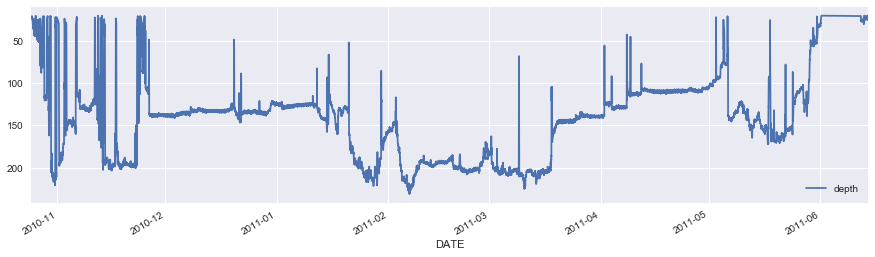

In [6]:
data.plot(y='depth', figsize=(15,4)).invert_yaxis()

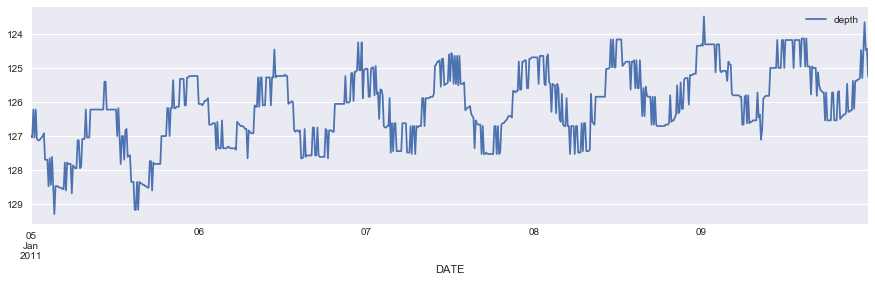

In [12]:
data['2011-1-5':'2011-1-9'].plot(y='depth', figsize=(15,4)).invert_yaxis()

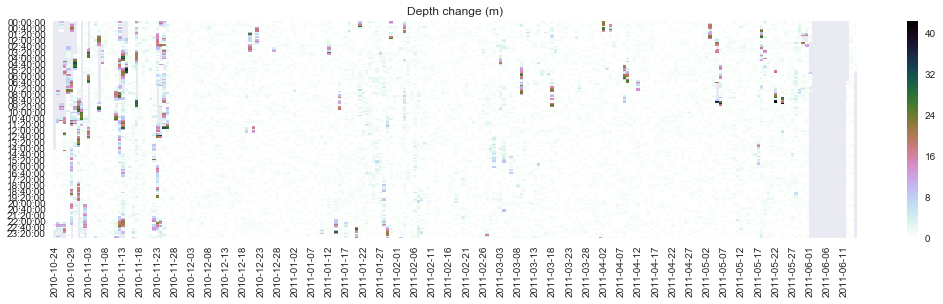

In [7]:
groups = data['depth_change'].groupby(pd.TimeGrouper('D'))
days = pd.DataFrame()
for name, group in groups:
    ts = pd.DataFrame({str(name.date()):group.values}, index=[val.time() for val in group.index])
    days = pd.concat([days, ts], axis=1)
plt.figure(figsize=(18, 4))
ax = sns.heatmap(days, cmap='cubehelix_r', xticklabels=5, yticklabels=4)
plt.title('Depth change (m)')

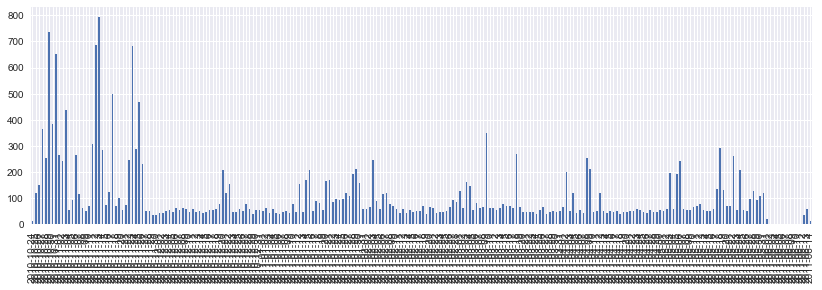

In [8]:
depth_change_sum = np.sum(days, axis=0)
depth_change_sum.plot(kind='bar', figsize=(14,4))

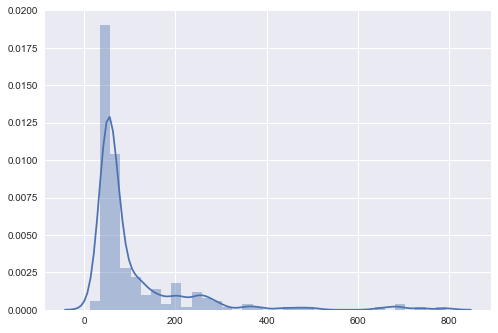

In [11]:
sns.distplot(depth_change_sum.dropna())